# Which one is a better plan?

Hi, today study is for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

I'm going to carry out a preliminary analysis of the plans based on a relatively small client selection. We have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. My job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

#### Description of the plans

**Note:** Megaline rounds seconds up to minutes, and megabytes to gigabytes. For
calls, each individual call is rounded up: even if the call lasted just one second, it will
be counted as one minute. For web traffic, individual web sessions are not rounded
up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes
this month, they will be charged for 2 gigabytes.

**Surf**

1. Monthly charge $20

2. 500 monthly minutes, 50 texts, and 15 GB of data

3. After exceeding the package limits (a. 1 minute = 3 cents; b. 1 text message = 3 cents; c. 1 GB of data = $10)


**Ultimate**

1. Monthly charge $70

2. 3000 monthly minutes, 1000 text messages, and 30 GB of data

3. After exceeding the package limits (a. 1 minute = 1 cent; b. 1 text message = 1 cent; c. 1 GB of data = $7)


### Analyze the data

I'm going to describe the customers' behavior by finding the minutes, texts, and volume of data the
users of each plan require per month. Then I'll calculate the mean, variance, and standard
deviation. Plot histograms and describe the distributions.

## Initialization

Let's import some tools to our project.

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
import seaborn as sns
import datetime as dt 
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
import math
from scipy import stats

## Load data

We have 4 dataframes provided so let's save them under appropriate names.

In [2]:
# Loading the data files into different DataFrames

try:
    calls = pd.read_csv('megaline_calls.csv')
    intnet = pd.read_csv('megaline_internet.csv')
    msg = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    intnet = pd.read_csv('/datasets/megaline_internet.csv')
    msg = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [3]:
# Printing the general/summary information about the plans' DataFrame

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Printing a sample of data for plans

plans.head(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This dataframe with only 2 rows will be used to reach our goal in finding which plan brings more value.

## Users

Now let's take a look at the dataframe we have with users. 

In [5]:
# Printing the general/summary information about the users' DataFrame

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Before we start further analyzing we should convert 'reg_date' column to proper data type.

In [6]:
users.reg_date = pd.to_datetime(users.reg_date, format='%Y-%m-%d')
users.churn_date = pd.to_datetime(users.churn_date, format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [7]:
# Printing a sample of data for users

users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


We can print the exact ammount of people for both of our plans.

In [8]:
users.plan.value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

'Serf' plan is more popular than 'ultimate'. We don't know which ones bring in more value yet, but for now it seems that 'serf' is.

We're still far from testing our hypothesis, let's continue on. We have the plan names in 'plan' column and we'd rather see them as boolean values since there's only 2 options.

In [9]:
# Converting the column 'plan' to binary with the help of dictionaries

plan = {
    'surf': 0,
    'ultimate': 1
}

In [10]:
# Replacing object values with boolean

users.plan = users.plan.apply(lambda x: plan[x]).astype(bool)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    bool          
 7   churn_date  34 non-null     datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.0+ KB


In [11]:
# Renaming 'plan' column

users.rename(columns={'plan': 'is_ult'}, inplace=True)
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,is_ult,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,True,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,False,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,False,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,False,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,False,NaT


## Calls

In [12]:
# Printing the general/summary information about the calls' DataFrame

calls.call_date = pd.to_datetime(calls.call_date, format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


I alredy converted the 'call_date' column data type to a better one, so let's add a new column to this dataframe that will indicated the numeral value of the month for each call.

In [13]:
# Adding a column

calls['month'] = calls.call_date.dt.month

In [14]:
# Printing a sample of data for calls

calls.head(15)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
5,1000_388,1000,2018-12-31,2.20,12
6,1000_510,1000,2018-12-27,5.75,12
7,1000_521,1000,2018-12-28,14.18,12
8,1000_530,1000,2018-12-28,5.77,12
9,1000_544,1000,2018-12-26,4.40,12


Great, now we can take a look at some users's total call durations per month. We'll use it later.

In [15]:
calls.groupby(by=['user_id','month'])['duration'].sum().sort_values(ascending=False)

user_id  month
1267     12       1431.22
1329     12       1292.09
1365     12       1283.20
1324     11       1234.57
1382     12       1222.37
                   ...   
1306     11          4.60
1414     8           3.90
1339     9           1.20
1407     11          0.00
1094     10          0.00
Name: duration, Length: 2258, dtype: float64

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame

msg.message_date = pd.to_datetime(msg.message_date, format='%Y-%m-%d')
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Like in our previous dataframe, I converted the date column from simple object to DateTime. Now let's add month column to this dataframe aswell.

In [17]:
# Adding a column

msg['month'] = msg.message_date.dt.month

In [18]:
# Printing a sample of data for messages

msg.head(5)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


We can take a peek at some values for messaging here. Very interesting.

In [19]:
msg.groupby(by=['user_id','month'])['id'].count().sort_values(ascending=False)

user_id  month
1052     12       266
1381     10       224
         11       180
1328     12       168
1132     11       166
                 ... 
1123     6          1
1263     12         1
1484     11         1
1263     11         1
1407     11         1
Name: id, Length: 1806, dtype: int64

## Internet

In [20]:
# Printing the general/summary information about the internet DataFrame

intnet.session_date = pd.to_datetime(intnet.session_date, format='%Y-%m-%d')
intnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [21]:
# Adding a column

intnet['month'] = intnet.session_date.dt.month

In [22]:
# Printing a sample of data for the internet traffic

intnet.head(20)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


Repeating the same steps for this dataframe we can check out traffic usage.

In [23]:
intnet.groupby(by=['user_id','month'])['mb_used'].sum().sort_values(ascending=False)

user_id  month
1379     12       70931.59
1121     12       66863.89
1292     12       52034.66
         8        51809.35
1240     8        49950.58
                    ...   
1108     12         233.17
1182     5          129.84
1076     7          113.74
1452     12          92.68
1081     4           92.31
Name: mb_used, Length: 2277, dtype: float64

## Study plan conditions

After fixing and adding on our dataframes we should carefully study the conditions for both plans.

In [24]:
# Printing out the plan conditions

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

To start of we should use round up our values in duration column to its' ceiling.

In [25]:
# Applying ciel method to duration values

calls.duration = calls.duration.apply(np.ceil)

In [26]:
# Calculating the number of calls made by each user per month and saving it

number_of_calls = calls.groupby(by=['user_id', 'month'])['id'].count()
number_of_calls

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64

In [27]:
# Calculating the total calls duration made by each user per month and saving it

total_minutes = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
total_minutes

count    sum
user_id month              
1000    12        16  124.0
1001    8         27  182.0
        9         49  315.0
        10        65  393.0
        11        64  426.0
...              ...    ...
1498    12        39  339.0
1499    9         41  346.0
        10        53  385.0
        11        45  308.0
        12        65  496.0

[2258 rows x 2 columns]

In [29]:
# Calculating the number of messages sent by each user per month and saving it

number_of_msg = msg.groupby(by=['user_id', 'month'])['id'].count()
number_of_msg

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

In [30]:
# Calculating the volume of internet traffic used by each user per month and saving it

traffic_volume = intnet.groupby(by=['user_id', 'month'])['mb_used'].sum()
traffic_volume

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
                    ...   
1498     12       23137.69
1499     9        12984.76
         10       19492.43
         11       16813.83
         12       22059.21
Name: mb_used, Length: 2277, dtype: float64

Now we have stored values for each user per month. Let's merge them into one table.

In [31]:
# Merging the data for calls, minutes, messages, internet based on user_id and month

data_frames = [traffic_volume, number_of_calls, total_minutes, number_of_msg]
total = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)

In [32]:
total

mb_used  id_x  count    sum   id_y
user_id month                                     
1000    12      1901.47  16.0   16.0  124.0   11.0
1001    8       6919.15  27.0   27.0  182.0   30.0
        9      13314.82  49.0   49.0  315.0   44.0
        10     22330.49  65.0   65.0  393.0   53.0
        11     18504.30  64.0   64.0  426.0   36.0
...                 ...   ...    ...    ...    ...
1470    11          NaN  81.0   81.0  632.0  156.0
        12          NaN  78.0   78.0  592.0  153.0
1484    11          NaN   2.0    2.0   38.0    1.0
1491    4           NaN   8.0    8.0   44.0    6.0
1482    10          NaN   NaN    NaN    NaN    2.0

[2293 rows x 5 columns]

Seems that some columns merged with default names. Let's rename them so that we can understand this data.

In [33]:
# Renaming columns

total.rename(columns={'id_x': 'calls', 'sum': 'call_dur', 'id_y': 'msgs'}, inplace=True)
total = total.drop(['count'], axis=1)

In [34]:
# Filling missing values in columns with 0

total = total.fillna(0)
total.head(20)

mb_used  calls  call_dur  msgs
user_id month                                 
1000    12      1901.47   16.0     124.0  11.0
1001    8       6919.15   27.0     182.0  30.0
        9      13314.82   49.0     315.0  44.0
        10     22330.49   65.0     393.0  53.0
        11     18504.30   64.0     426.0  36.0
        12     19369.18   56.0     412.0  44.0
1002    10      6552.01   11.0      59.0  15.0
        11     19345.08   55.0     386.0  32.0
        12     14396.24   47.0     384.0  41.0
1003    12     27044.14  149.0    1104.0  50.0
1004    5       6547.21   21.0     193.0   7.0
        6      20672.82   44.0     275.0  18.0
        7      24516.62   49.0     381.0  26.0
        8      27981.74   49.0     354.0  25.0
        9      18852.72   42.0     301.0  21.0
        10     14541.63   61.0     365.0  24.0
        11     21850.78   54.0     476.0  25.0
        12     21389.29   50.0     427.0  31.0
1005    12     17140.17   59.0     496.0  11.0
1006    11      2068.37    2.0      10.0  15.0

In [35]:
total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (1000, 12) to (1482, 10)
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mb_used   2293 non-null   float64
 1   calls     2293 non-null   float64
 2   call_dur  2293 non-null   float64
 3   msgs      2293 non-null   float64
dtypes: float64(4)
memory usage: 98.9 KB


The columns for number of calls and messages are in float data type we can convert them to integer but we don't have to do so.

In [36]:
# Add the plan information

new_total = total.merge(users[['user_id', 'is_ult', 'city']], how='left', on='user_id')
new_total

,user_id,mb_used,calls,call_dur,msgs,is_ult,city
0,1000,1901.47,16.0,124.0,11.0,True,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,6919.15,27.0,182.0,30.0,False,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,13314.82,49.0,315.0,44.0,False,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,22330.49,65.0,393.0,53.0,False,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,18504.30,64.0,426.0,36.0,False,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...
2288,1470,0.00,81.0,632.0,156.0,False,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"
2289,1470,0.00,78.0,592.0,153.0,False,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA"
2290,1484,0.00,2.0,38.0,1.0,False,"Dallas-Fort Worth-Arlington, TX MSA"
2291,1491,0.00,8.0,44.0,6.0,False,"Grand Rapids-Kentwood, MI MSA"


Now we have a dataframe with every user's monthly internet traffic consumption, total call duration, number of direct calls and messages. This will allow us to create a function that will sum all the monthly costs for each user.

In [37]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [38]:
# Converting Mbs to Gbs and renaming affected column

new_total.mb_used = new_total.mb_used.apply(lambda x: x / 1024)
new_total = new_total.rename(columns={'mb_used': 'gb_used'})

In [39]:
new_total.head()

,user_id,gb_used,calls,call_dur,msgs,is_ult,city
0,1000,1.856904,16.0,124.0,11.0,True,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,6.756982,27.0,182.0,30.0,False,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,13.002754,49.0,315.0,44.0,False,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,21.807119,65.0,393.0,53.0,False,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,18.070605,64.0,426.0,36.0,False,"Seattle-Tacoma-Bellevue, WA MSA"


In [40]:
# Writing a function to determine monthly service pay

def tcost(row):
    
    plan = row['is_ult']
    traffic = row['gb_used']
    minutes = row['call_dur']
    msg = row['msgs']
 
    if plan:
        plan_cost = plans[plans.plan_name == 'ultimate']['usd_monthly_pay'].loc[1]
        
        messages_included = plans[plans.plan_name == 'ultimate']['messages_included'].loc[1]
        
        mb_per_month_included = plans[plans.plan_name == 'ultimate']['mb_per_month_included'].loc[1]
        
        minutes_included = plans[plans.plan_name == 'ultimate']['minutes_included'].loc[1]
        
        usd_per_gb = plans[plans.plan_name == 'ultimate']['usd_per_gb'].loc[1]
        
        usd_per_message = plans[plans.plan_name == 'ultimate']['usd_per_message'].loc[1]
        
        usd_per_minute = plans[plans.plan_name == 'ultimate']['usd_per_minute'].loc[1]
        
    else:
        plan_cost = plans[plans.plan_name == 'surf']['usd_monthly_pay'].loc[0]
        
        messages_included = plans[plans.plan_name == 'surf']['messages_included'].loc[0]
        
        mb_per_month_included = plans[plans.plan_name == 'surf']['mb_per_month_included'].loc[0]
        
        minutes_included = plans[plans.plan_name == 'surf']['minutes_included'].loc[0]
        
        usd_per_gb = plans[plans.plan_name == 'surf']['usd_per_gb'].loc[0]
        
        usd_per_message = plans[plans.plan_name == 'surf']['usd_per_message'].loc[0]
        
        usd_per_minute = plans[plans.plan_name == 'surf']['usd_per_minute'].loc[0]
    
    if traffic > mb_per_month_included and ~plan:
        traffic_cost = math.ceil(((traffic*1024) - mb_per_month_included)/1024) * usd_per_gb
        
    elif traffic > mb_per_month_included and plan:
        traffic_cost = math.ceil(((traffic*1024)- mb_per_month_included)/1024) * usd_per_gb
    else: 
        traffic_cost = 0
        
    if minutes > minutes_included and ~plan:
        minutes_cost = (minutes - minutes_included) * usd_per_minute
        
    elif minutes > minutes_included and plan:
        minutes_cost = (minutes - minutes_included) * usd_per_minute
    else:
        minutes_cost = 0
        
    if msg > messages_included and ~plan:
        messages_cost = (msg - messages_included) * usd_per_message
        
    elif msg > messages_included and plan:
        messages_cost = (msg - messages_included) * usd_per_message
    else: 
        messages_cost = 0
        
    
            
            
    total_cost = plan_cost + traffic_cost + minutes_cost + messages_cost
    
    return total_cost

In [42]:
# Creating a new column using the function

new_total['total_cost'] = new_total.apply(tcost,axis=1)

In [43]:
# Replacing boolean values to strings and renaming the column

new_total['is_ult'] = new_total.is_ult.apply(lambda x: 'ultimate' if x==True else 'surf')
new_total = new_total.rename(columns={'is_ult': 'plan'})
new_total

,user_id,gb_used,calls,call_dur,msgs,plan,city,total_cost
0,1000,1.856904,16.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,6.756982,27.0,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,13.002754,49.0,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,21.807119,65.0,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.09
4,1001,18.070605,64.0,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
...,...,...,...,...,...,...,...,...
2288,1470,0.000000,81.0,632.0,156.0,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",27.14
2289,1470,0.000000,78.0,592.0,153.0,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",25.85
2290,1484,0.000000,2.0,38.0,1.0,surf,"Dallas-Fort Worth-Arlington, TX MSA",20.00
2291,1491,0.000000,8.0,44.0,6.0,surf,"Grand Rapids-Kentwood, MI MSA",20.00


## Study user behaviour

In order for us to study user behavior properly we should plot for both plans since our goal is to find out which plan brings in more revenue. 

We'll compare each plan user's behavior in minutes they spend, messages they send and internet traffic they use. I'll be using the same plot methods for this analysis: histogram, barplot and boxplot.

Before we start let's see the customer to plan distribution.

In [44]:
new_total.plan.value_counts()

surf        1573
ultimate     720
Name: plan, dtype: int64

This way we'll keep in mind there's less greatly less Ultimate plan users than Surf plan users.

### Calls

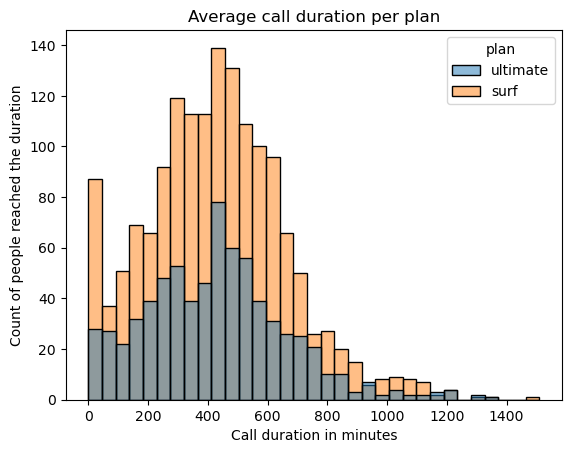

In [45]:
# Comparing average duration of calls per each plan per each distinct month

sns.histplot(new_total,x='call_dur',hue='plan')
plt.title('Average call duration per plan')
plt.xlabel('Call duration in minutes')
plt.ylabel('Count of people reached the duration')
plt.show()

In this barplot we have call duration on the X axis and number of people with those call durations on Y axis.

The orange color bars represent Surf users and as we can see they outnumber Ultimate users in overall minutes spent on call. Both don't have extremely long calls but even on 1000 minute mark 'Serf' users are predominant.

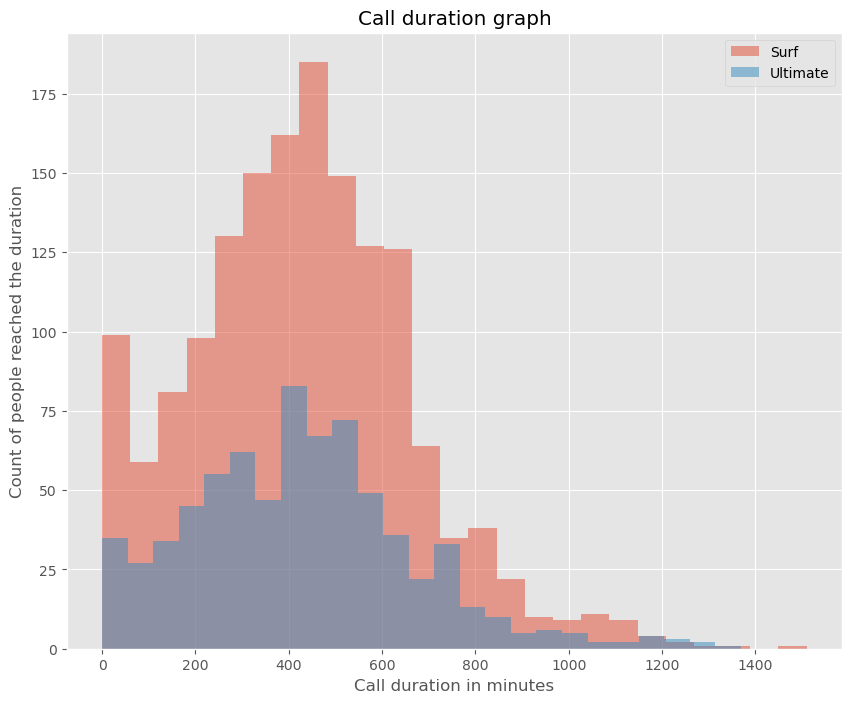

In [46]:
# Comparing the number of minutes users of each plan require each month

plt.style.use('ggplot') 

new_total.groupby('plan')['call_dur'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Call duration graph')
plt.xlabel('Call duration in minutes')
plt.ylabel('Count of people reached the duration')

plt.show()

Here we can see a normal distribution graph where Serf users have twice the mass in numbers with 400's of the customers at the peak with 500 minutes for calls.

Ultimate users have lower call duration in average than Serf's users and also Ultimates have higher variance than Serf.

We can do a boxplot for the same column in our dataframe.

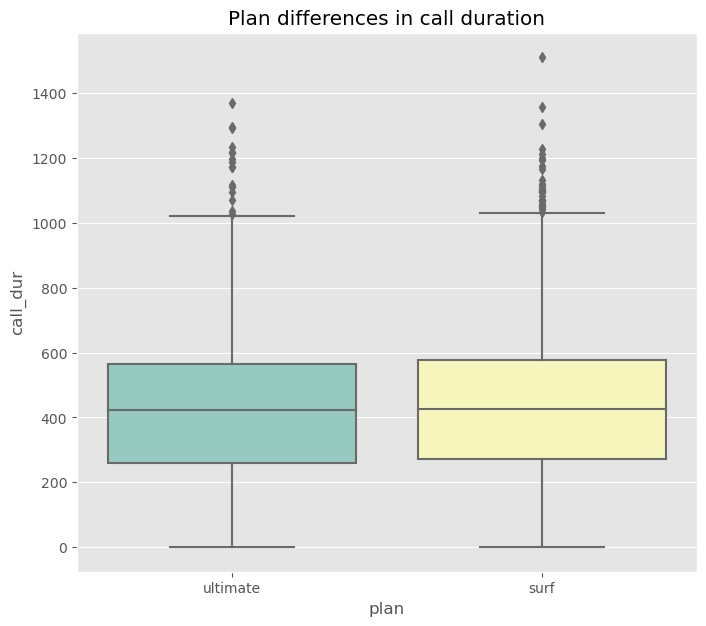

In [49]:
# Ploting a boxplot to visualize the distribution of the monthly call duration

fig, ax = plt.subplots(figsize=(8,7))
plt.title('Plan differences in call duration')
ax = sns.boxplot( x='plan',y="call_dur",
                 data=new_total, palette="Set3")

Like we noticed before the boxplot, the average in boxplot on the right is lower than the left one. But Serf's users have more outliers just at the 1000 minutes mark and up to 1200 minutes.

### Messages

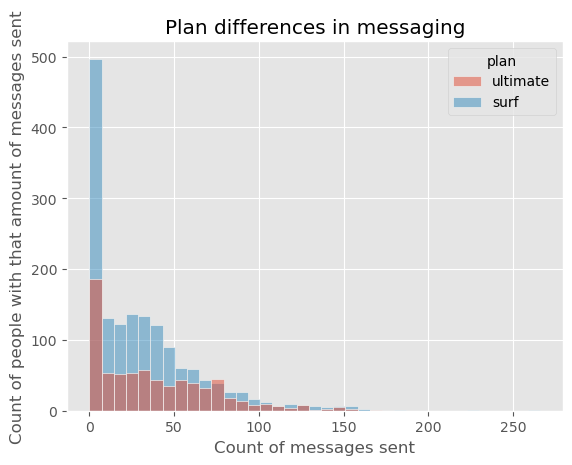

In [50]:
# Comparing the number of messages users of each plan tend to send each month

sns.histplot(new_total,x='msgs',hue='plan')
plt.title('Plan differences in messaging')
plt.xlabel('Count of messages sent')
plt.ylabel('Count of people with that amount of messages sent')
plt.show()

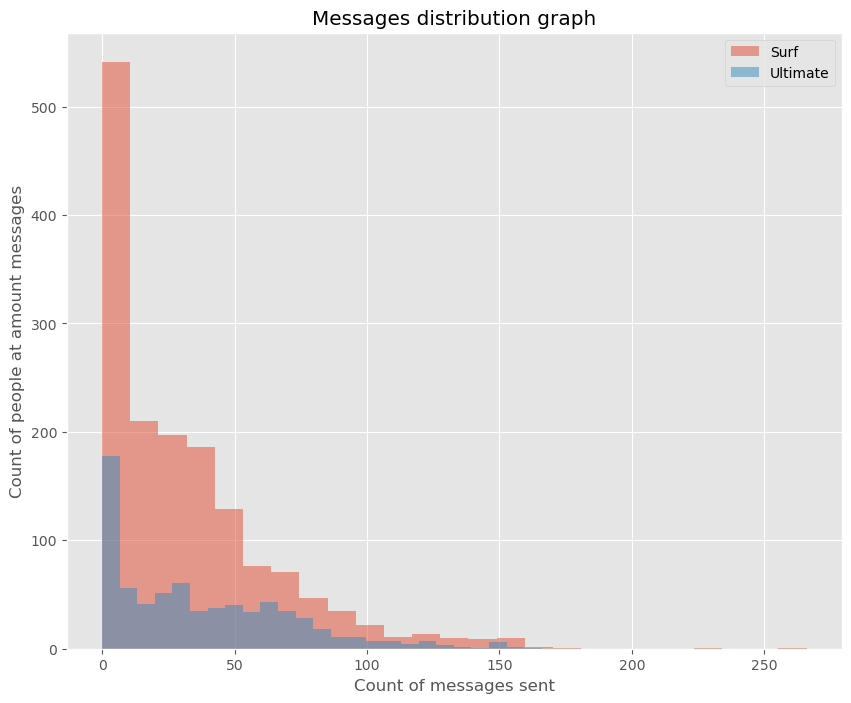

In [51]:
# Comparing the amount of messages sent by users per plan

new_total.groupby('plan')['msgs'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Messages distribution graph')
plt.xlabel('Count of messages sent')
plt.ylabel('Count of people at amount messages')

plt.show()

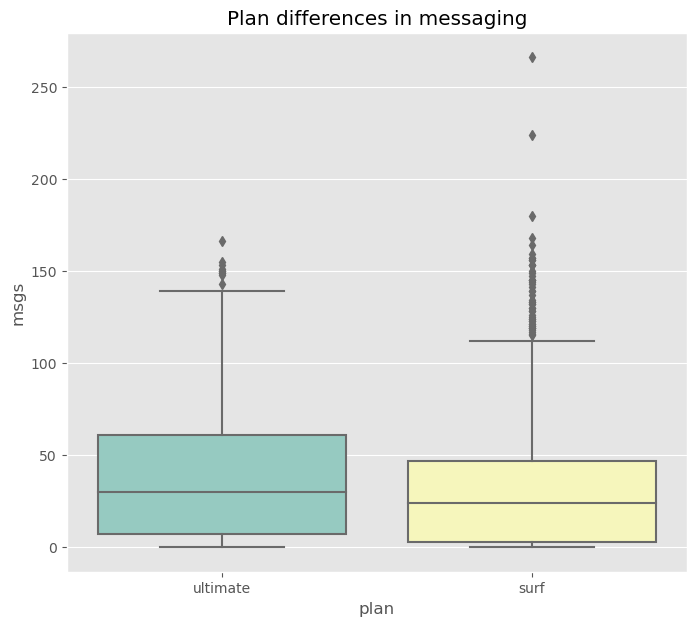

In [52]:
# Ploting a boxplot to visualize the distribution of messages sent

fig, ax = plt.subplots(figsize=(8,7))
plt.title('Plan differences in messaging')
ax = sns.boxplot( x='plan',y="msgs",
                 data=new_total, palette="Set3")

On average Ultimate users send more messages than Serf's users. But also we can see great amount of outliers for the Serf plan.

### Internet

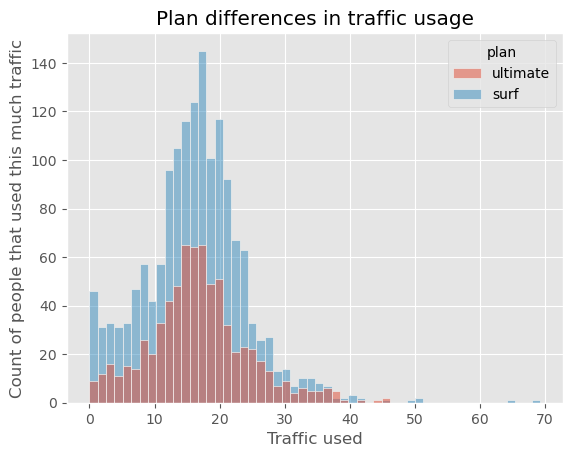

In [53]:
# Comparing the traffic usage for each plan

sns.histplot(new_total,x='gb_used',hue='plan')
plt.title('Plan differences in traffic usage')
plt.xlabel('Traffic used')
plt.ylabel('Count of people that used this much traffic')
plt.show()

Once again we observe the tiny rock in the shadow of a mountain. Our Serf plan customers surpass the Ultimate plan customers in sheer numbers with similar distribution for Gb usage.

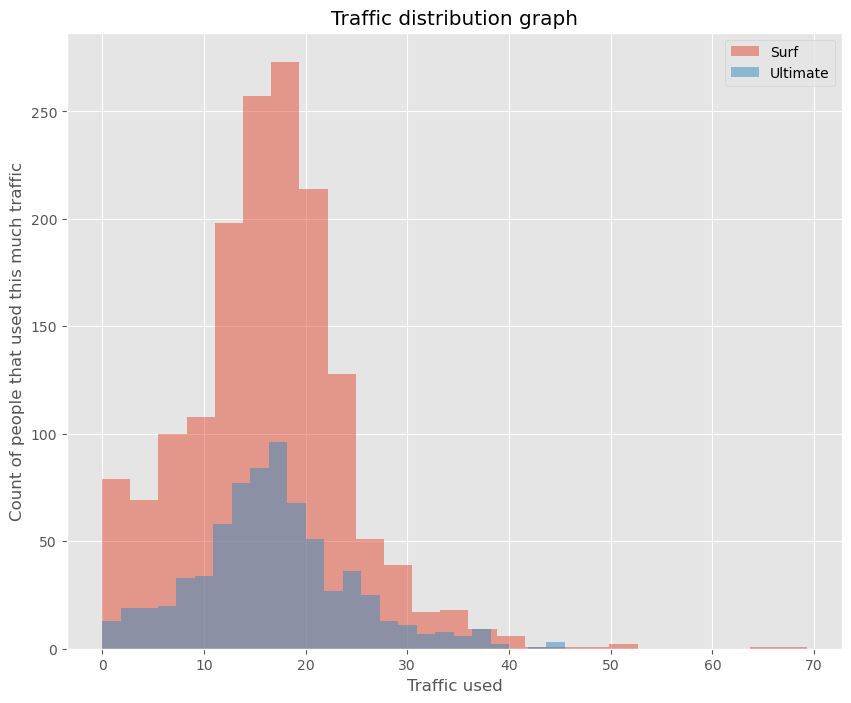

In [54]:
# Comparing the amount of Gbs used for both plans

new_total.groupby('plan')['gb_used'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Traffic distribution graph')
plt.xlabel('Traffic used')
plt.ylabel('Count of people that used this much traffic')

plt.show()

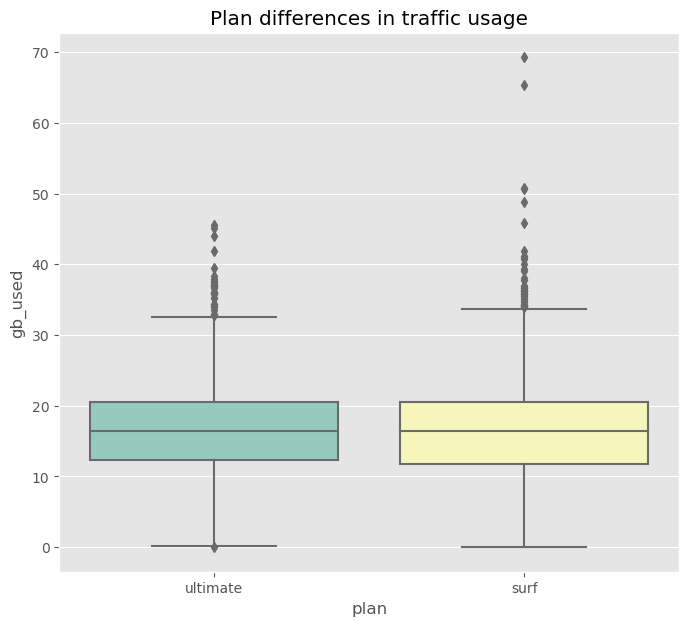

In [55]:
# Ploting a boxplot to visualize the distribution of traffic usage

fig, ax = plt.subplots(figsize=(8,7))
plt.title('Plan differences in traffic usage')
ax = sns.boxplot( x='plan',y="gb_used",
                 data=new_total, palette="Set3")

Same dynamic we have been noticing throughout this comparison. Now we that we observed our customers behavior we can take a look at their spending.

In [56]:
# Displaying statistics on call duration, messages and traffic usage per plan

new_total.pivot_table(index='plan', values=['call_dur', 'msgs', 'gb_used'],
                       aggfunc=['mean', 'std', 'var'])

mean                               std                       \
            call_dur    gb_used       msgs    call_dur   gb_used       msgs   
plan                                                                          
surf      428.749523  16.170199  31.159568  234.453150  7.825697  33.566717   
ultimate  430.450000  16.811230  37.551389  240.508762  7.667869  34.767179   

                   var                          
              call_dur    gb_used         msgs  
plan                                            
surf      54968.279461  61.241527  1126.724522  
ultimate  57844.464812  58.796209  1208.756744

## Revenue

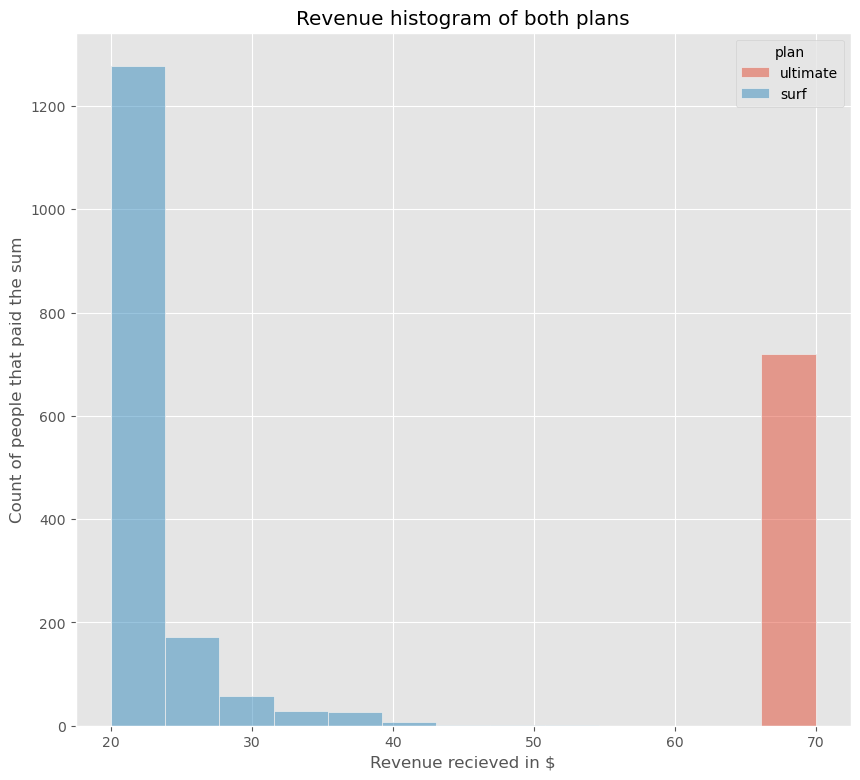

In [57]:
# Displaying total revenue 

fig, ax = plt.subplots(figsize=(10,9))
plt.title('Revenue histogram of both plans')
plt.xlabel('Revenue recieved in $')
plt.ylabel('Count of people that paid the sum')
ax = sns.histplot(new_total, x='total_cost', hue="plan")

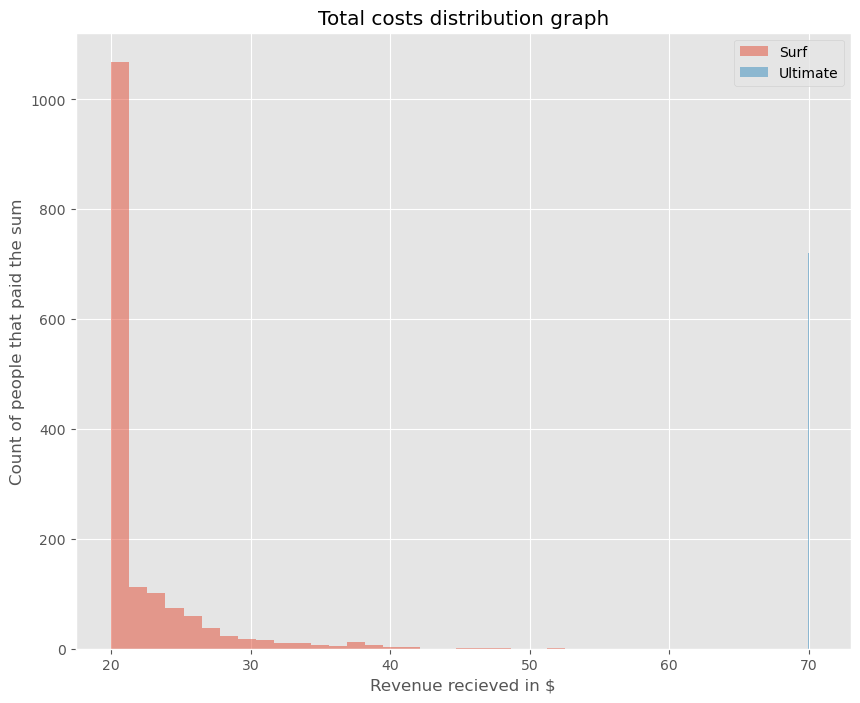

In [58]:
# Displaying total revenue

new_total.groupby('plan')['total_cost'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Total costs distribution graph')
plt.xlabel('Revenue recieved in $')
plt.ylabel('Count of people that paid the sum')

plt.show()

In [59]:
# Calculating the mean of the total cost

new_total.groupby(['plan'])['total_cost'].mean()

plan
surf        22.054151
ultimate    70.000000
Name: total_cost, dtype: float64

In [60]:
# Calculating the variance of the total cost

new_total.groupby(['plan'])['total_cost'].var()

plan
surf        15.642668
ultimate     0.000000
Name: total_cost, dtype: float64

In [61]:
# Calculating the standard deviation of the total cost

new_total.groupby(['plan'])['total_cost'].std()

plan
surf        3.955081
ultimate    0.000000
Name: total_cost, dtype: float64

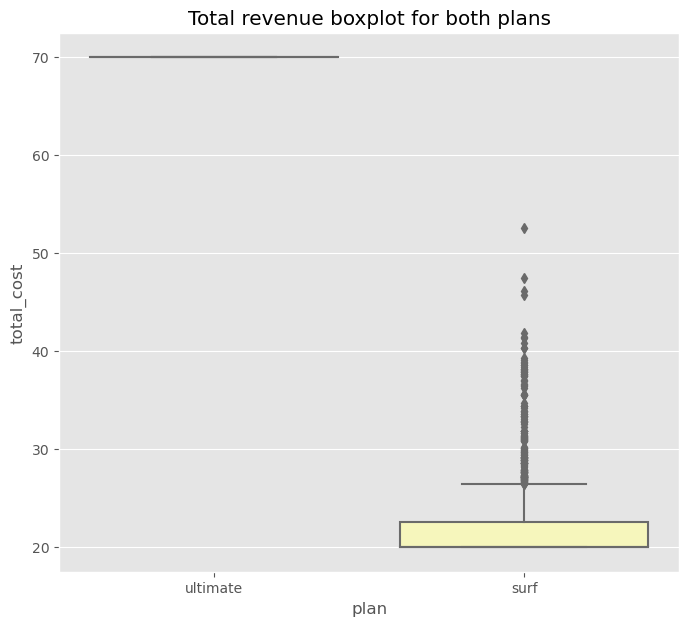

In [62]:
# Displaying total revenue with boxplot

fig, ax = plt.subplots(figsize=(8,7))
plt.title('Total revenue boxplot for both plans')
ax = sns.boxplot( x='plan',y="total_cost",
                 data=new_total, palette="Set3")

Let's find out the exact numbers we have for both plans. We can use groupby method to group by both plans and sum up the total cost.

In [63]:
# Who pays more?

new_total.groupby(by='plan')['total_cost'].sum()

plan
surf        34691.18
ultimate    50400.00
Name: total_cost, dtype: float64

### Testing the hypotheses

- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in NY-NJ area is different from that of the users from other regions.

Our alpha value will be 0,5.

**I will explain:**

- How I formulated the null and alternative hypotheses.

- What criterion I used to test the hypotheses and why.


## Test statistical hypotheses

Our first **null hypothesis** is that the average revenue from users of the Ultimate and Surf calling plans does not differ. Thus our **alternative hypothesis** is that it does differ.

Let's create separate dataframes to perform testing on.

In [64]:
# Using query to declare and assign parts of our dataframe accordingly

surf = new_total.query('plan == "surf"')
ultimate = new_total.query('plan == "ultimate"')

In [65]:
# Creating samples for null hypothesis

sample01 = surf.total_cost.copy()
sample02 = ultimate.total_cost.copy()

In [66]:
# Creating a function to perform normal t test

def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 

In [67]:
# Creating function to perform Levene's test

def t_test_levene(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=stats.ttest_ind(sample1, sample2,equal_var=option_var).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 

In [68]:
# Printing results of both functions for null hypothesis

print(t_test_levene(sample01, sample02))
print()
print(t_test(sample01, sample02))

Reject H0: average of sample 1 is not equal to average of sample 2
None

Reject H0: average of sample 1 is not equal to average of sample 2
None


In [69]:
# Displaying revenue statistics

new_total.groupby(['plan'])['total_cost'].describe().T

plan,surf,ultimate
count,1573.000000,720.0
mean,22.054151,70.0
std,3.955081,0.0
min,20.000000,70.0
25%,20.000000,70.0
50%,20.000000,70.0
75%,22.580000,70.0
max,52.550000,70.0


The mean value here represents the average value in both plans thus we can compare them. 

Our second **null hypothesis** is that the average revenue from users in NY-NJ area does not differ from the users of other regions, and our **alternative hypothesis** for this is the opposite. 

We can test it by creating two dataframes: one with NY-NJ residents; and other with non NY-NJ residents.

In [70]:
# Creating separate dataframe only with residents of NY-NJ

ny_nj = new_total[new_total.city.str.contains('NY|NJ')]

ny_nj_mask = new_total.city.str.contains('NY|NJ')

# Creating separate dataframe only with residents not from NY-NJ

not_ny_nj = new_total.query('~@ny_nj_mask')

In [71]:
# Creating samples for the alternative hypothesis testing

sample03 = ny_nj.total_cost.copy()
sample04 = not_ny_nj.total_cost.copy()

In [72]:
# Printing results of both functions for alternative hypothesis

print(t_test_levene(sample03, sample04))
print()
print(t_test(sample03, sample04))

Reject H0: average of sample 1 is not equal to average of sample 2
None

Reject H0: average of sample 1 is not equal to average of sample 2
None


In [73]:
# Displaying statistics for NY-NJ revenue

print(ny_nj.total_cost.describe())

# Displaying statistics for non NY-NJ revenue

print(not_ny_nj.total_cost.describe())

count    488.000000
mean      31.193361
std       19.531144
min       20.000000
25%       20.000000
50%       20.390000
75%       27.095000
max       70.000000
Name: total_cost, dtype: float64
count    1805.000000
mean       38.708488
std        22.978687
min        20.000000
25%        20.000000
50%        23.240000
75%        70.000000
max        70.000000
Name: total_cost, dtype: float64


In [74]:
print('Revenue difference:',new_total.groupby(by='plan')['total_cost'].sum())

Revenue difference: plan
surf        34691.18
ultimate    50400.00
Name: total_cost, dtype: float64


In [75]:
print('NY and NJ residents:',math.ceil(ny_nj.total_cost.sum()))
print('Other areas:',math.ceil(not_ny_nj.total_cost.sum()))

NY and NJ residents: 15223
Other areas: 69869


We supported alternative hypotheses in both cases,  the average revenue from users of the Ultimate and Surf calling plans does differ. We discovered that the revenue from calling plans differs and Ultimate's userbase brings in more revenue. 

The average revenue from users in NY-NJ area does differ as well. The difference here is quite significant but foreseeable.

## General conclusion



We rejected both null hypothesises and supported the alternative ones.

Let's go step by step on how we got to this point. We had five separate dataframes all connected with 'user_id's. We started with simply looking at each of them first and changing the datatype of dates to get the month of each call, message and internet session. Then  we created variables with grouped data that we had for each included activities mentioned before, after merging the variables into separate dataframe with each user's activity for each month. Then all we had to do is merge the new dataframe with 'users' dataframe by 'user_id' column once again, and write a function to sum all the costs overtime for each user.

Now that we had clear data it was time to study the user's behavior. Users of Surf calling plan were overwhelming in masses over Ultimate since there was greater percentage of Surf in our 500 individual customers sample data. After testing the hypotheses we are ready to conclude the analysis.

At the end we saw the total revenues from both calling plans and users of **Ultimate calling plan** were bringing in more than **Surf calling plan** users. So our company's commercial department should focus on the **Ultimate calling plan** and adjust the advertising budget accordingly.